# FBDA LAB 4 (hirarcial clusterin + DBSCAN)


## Lab instructions
1. Carefully read and follow all instructions.
2. You need to do all 3 tasks (attendance + Evaluation + Submission)
3. You can search the basics of python, concepts, and syntax online.
4. TA isn’t ment to resolve your PC or internet issues. TA is only here to guide you through lab.
5. No evaluation would be done after Lab’s timing. So, keep the track of time.
6. Do keep in mind that sharing the code, discussing it during lab or looking for online solution is highly unethical, and all actions would be considered as plagiarism.
7. Plagiarism will result in serious penalty
8. Not Eveluationg at your turn, after 2pm could result in 0.

###### Instruction - rename this file as rollnumber_lab4; for example
###### 20l-1212_lab4

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram

# Task1: 
Create a random blob of data with only 2 dimentions. Number of nodes equal to your roll number

#### eg: 20l-1212= 1212 nodes

As for labels, data should be creaated such that total number of labels should be equal to the sum of all the digits in your roll number.

#### eg: total labels = 1+2+1+2 = 6

(1113, 2)
(1113,)
[3 2 1 ... 5 3 1]


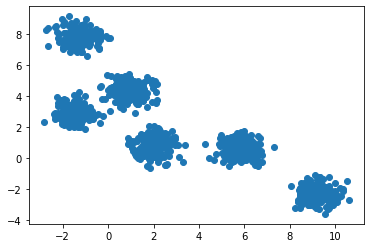

In [193]:
# create Blob with 1113 total labels and 1+1+1+3 = 6 dimensions
# using make_blob function
# help(make_blobs)
x,y = make_blobs(n_samples=1113, n_features=2, centers=6, random_state=0, cluster_std=0.5, shuffle = True)

print(x.shape)
print (y.shape)
print(y)
X = StandardScaler().fit_transform(x)
plt.scatter(x[:,0],x[:,1])

# Task2:
Save this into csv format (without any header) and then load it

In [194]:
#save csv
import csv
with open('data.csv','w') as file:
    csv.writer(file).writerows(x)

In [195]:
#Load csv
data=pd.read_csv('data.csv',names=['x_scaled','y_scaled'])
data.head()

,x_scaled,y_scaled
0,-1.411536,7.831355
1,-0.986216,2.602194
2,2.232646,1.206107
3,5.450076,-0.006649
4,1.198202,4.470624


# Task3:
Display first 5 lines of the blob

In [196]:
#Print 10 nodes, starting from 5th nodes (mean 5th node to 15th nodes)
data[5:15]

,x_scaled,y_scaled
5,-1.334988,7.580445
6,-2.000648,3.040104
7,1.321179,4.954710
8,-0.862919,7.770240
9,0.909830,4.154892
10,0.632351,3.696749
11,1.349864,3.709315
12,1.510525,4.077094
13,9.250699,-2.291609
14,6.084509,-0.138000


# Task4:
Scale the data manually 

In [197]:
# you can't use built in method to scale a feature
# hint: A quick scaling method is (x-min(x) / max(x)-min(x)), where x is your feature vector

data.iloc[:,0]=(data.iloc[:,0]-min(data.iloc[:,0]))/(max(data.iloc[:,0])-min(data.iloc[:,0]))
data.iloc[:,1]=(data.iloc[:,1]-min(data.iloc[:,1]))/(max(data.iloc[:,1])-min(data.iloc[:,1]))
data.head()

,x_scaled,y_scaled
0,0.104968,0.896105
1,0.136704,0.486254
2,0.376885,0.376832
3,0.616958,0.281779
4,0.299698,0.632698


# Task5:
Calculate Proximity (Distance) matrix and display the complete matrix on screen

In [198]:
# Choose linkage of ward type only and explain what it does.
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
print(distance_matrix)

[[1.62000000e+02 9.88000000e+02 1.59494230e-04 2.00000000e+00]
 [6.83000000e+02 8.18000000e+02 1.83777955e-04 2.00000000e+00]
 [2.16000000e+02 9.67000000e+02 2.04886363e-04 2.00000000e+00]
 ...
 [2.21700000e+03 2.22000000e+03 5.31737849e+00 5.57000000e+02]
 [2.21600000e+03 2.22100000e+03 7.25185760e+00 5.56000000e+02]
 [2.22200000e+03 2.22300000e+03 1.47695394e+01 1.11300000e+03]]


# Task6:
Print its dendogram and state your results after looking at the dendogram (result should be in in form for a mark down cell)

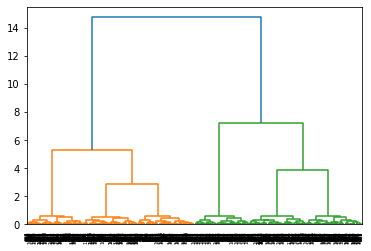

In [199]:
# create dandrogram
dn=dendrogram(distance_matrix)

#### Results:

This dendrogram is classifying all data into two major clusters which represent the whole spread of data. It can be seen here that dendrogram is showing two colors of data which portrays that there are 2 dimensions in the given data.

# Task7:
apply hirarchical Clustering using 3 different distance linkage method (single, complete, centroid)

1. State the time it take

2. Visualize it

3. State the purity of each cluster

4. At the end state the winner with proper reason

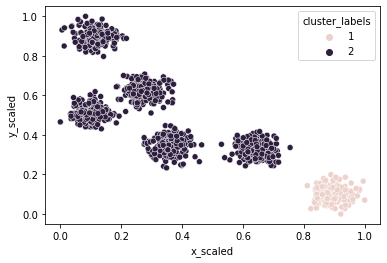

In [207]:
# Single Linkage
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='single', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

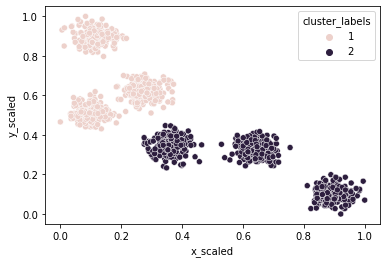

In [208]:
# Complete Linkage
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='complete', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

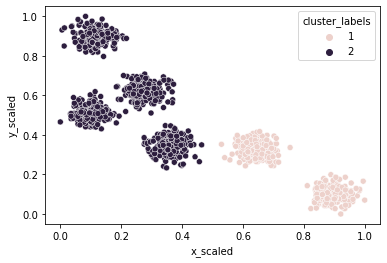

In [202]:
# Centroid Distance
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='centroid', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

### Results

All these algorithms take same time here because data is already formed into distinct clusters and algorithm did not need to work that hard in this case, another factor here could be the machine running this algorithm having distinct cores for separating machine learning tasks. 
Another factor here is that the data is very small in dimensionality and length which is easier for the algorithm to process.

The centroid method is better here because it classifies the closer points better and gives better overall clustering.

# Task8:
repeat the same activity you had done in task 1, but this time, do it for gracefully now 

1. Number of nodes should be equal to your roll number
2. Instead of labels being equal to total sum of your roll number digits, just do it for create 3 labels
3. don't need to save dataframe, just display it

#### for creating a circular data, you can use below funcation

In [203]:
# Function for creating datapoints in the form of a circle
np.random.seed(3)
def create_circle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

               0          1
0     452.503486  26.377893
1     443.317179 -23.113849
2     477.664046 -55.981494
3     445.245774 -77.891077
4     442.481509   3.520697
...          ...        ...
1108  537.458211 -18.263757
1109  429.280973 -40.792205
1110  477.084378  -7.333250
1111  452.590329 -23.729163
1112  464.326359 -41.188300

[1113 rows x 2 columns]


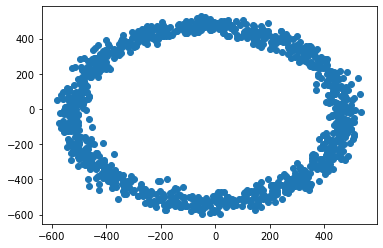

In [205]:
# create & visualize your dataframe
df=pd.DataFrame(create_circle(500,1113))
print(df)
plt.scatter(df[0],df[1]);